# IMPORTING LIBRARIES.

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [371]:
pd.set_option('display.max_columns',999)

In [372]:
import statsmodels.api as sm

In [373]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [374]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [375]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [376]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [377]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [378]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [379]:
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [380]:
from scipy.stats import normaltest,f_oneway
from scipy.stats import ttest_ind

In [381]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [382]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor

In [383]:
dt = DecisionTreeRegressor()
et = ExtraTreeRegressor()

In [384]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [385]:
abr = AdaBoostRegressor()
br = BaggingRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()

In [386]:
from sklearn.model_selection import GridSearchCV

In [387]:
from sklearn.model_selection import KFold

# READING THE DATA SET.

In [388]:
data = pd.read_csv('data.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02-03-2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# NULL VALUE'S CHECK.

In [389]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

# MEASURES OF CENTRAL TENDENCY.

In [390]:
data[['Customer Lifetime Value','Income','Monthly Premium Auto','Total Claim Amount']].describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,434.088794
std,6870.967608,30379.904734,34.407967,290.500092
min,1898.007675,0.000000,61.000000,0.099007
25%,3994.251794,0.000000,68.000000,272.258244
50%,5780.182197,33889.500000,83.000000,383.945434
75%,8962.167041,62320.000000,109.000000,547.514839
max,83325.381190,99981.000000,298.000000,2893.239678


# SHAPE OFTHE DATA SET.

In [391]:
data.shape

(9134, 24)

# DATA VISUALIZATION AND INFERENCES.

#### UNI-VARIATE ANALYSIS

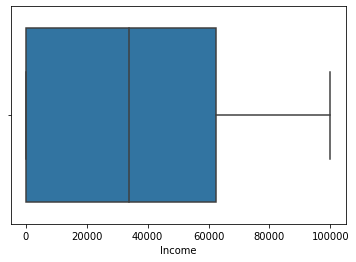

In [392]:
sns.boxplot(data['Income'])
plt.show()

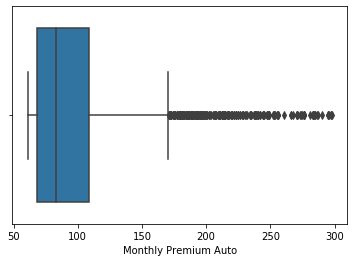

In [393]:
sns.boxplot(data['Monthly Premium Auto'])
plt.show()

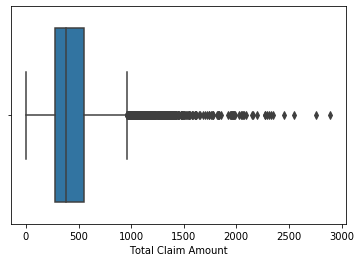

In [394]:
sns.boxplot(data['Total Claim Amount'])
plt.show()

As we can see that there are outlier's in the total claim amount feature and also the income feature, the general trend is to remove the outlier's are a better model , since our DOMAIN is related to insurance and banking industry, we must be accepting the outlier's as they are the potential high revenue making customer's.
And there are no outlier's in the income feature.
Conclusion: WE ARE NOT DOING ANY OUTLIER TREATMENT.

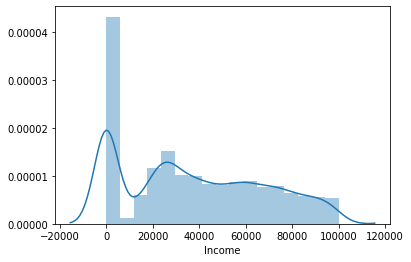

In [395]:
sns.distplot(data['Income'])
plt.show()

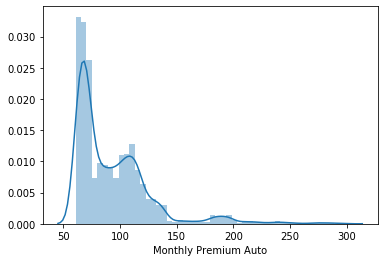

In [396]:
sns.distplot(data['Monthly Premium Auto'])
plt.show()

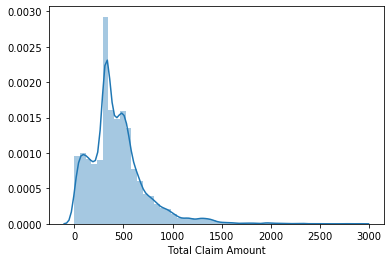

In [397]:
sns.distplot(data['Total Claim Amount'])
plt.show()

As we can see that none of the continuous features are normally distributed, no matter what distribution a particular feature tend's to follow we as data analyst, we are inclined to make it normal, but there is a possible chance that the feature may follow some other distribution, So in our case , we want to make the distribution's normal, we can apply some transformation's to the data and see if we can achieve a normally distributed feature.

#### TRANSFORMATION OF THE NUMERICAL FEATURES

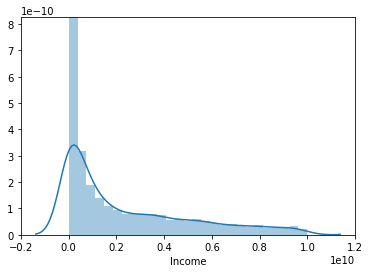

In [398]:
sns.distplot(data['Income']**2)
plt.show()

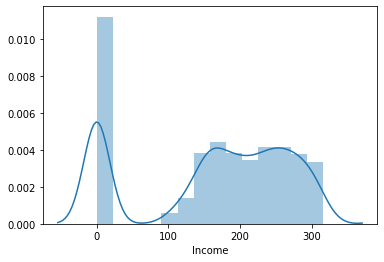

In [399]:
sns.distplot(data['Income']**(1/2))
plt.show()

As we can see that while we are trying to transform the data to make it normal,rather the distribution is getting skewed, or is having multiple peaks which again is a problem to our model, hence we just stick with the same distribution of the feature.

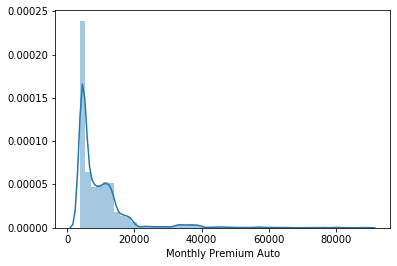

In [400]:
sns.distplot(data['Monthly Premium Auto']**(2))
plt.show()

The monthly premium auto feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE) but as we can see that after the square transformation the data is getting heavily skewed, so we stick with the actual distribution again.

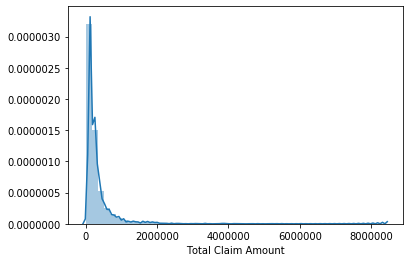

In [401]:
sns.distplot(data['Total Claim Amount']**2)
plt.show()

Again for the total claim amount after applying the transformation's the data is getting skewed, and hence we stick to the actual distibution of the data.

Conclusion: No matter what power transformation we are applying to the numerical features, it is still not getting normally distributed, and moreover the data is getting skewed, so rather we will just stick with the actual distribution of the feature in our model building.

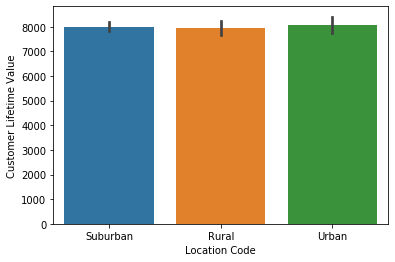

In [402]:
sns.barplot(x = 'Location Code',y='Customer Lifetime Value',data = data)
plt.show()

The average customer lifetime value of the customer who stay in different location code's is the same so while creating the model we can dis regard the feature.

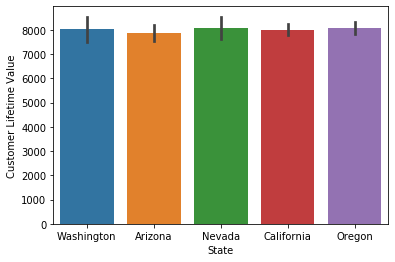

In [403]:
sns.barplot(x = 'State',y='Customer Lifetime Value',data = data)
plt.show()

The average customer lifetime value of the customer who stay in different state is the same so while creating the model we can dis regard the feature.

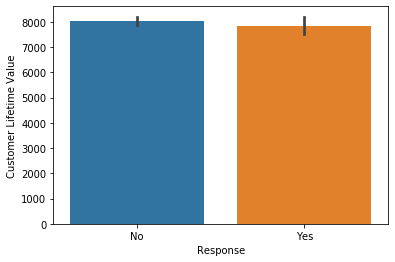

In [404]:
sns.barplot(x = 'Response',y='Customer Lifetime Value',data = data)
plt.show()

It doesn't matter if the customer take's the marketing call, or he doesn't as the average customer lifetime value for both of them is the same.

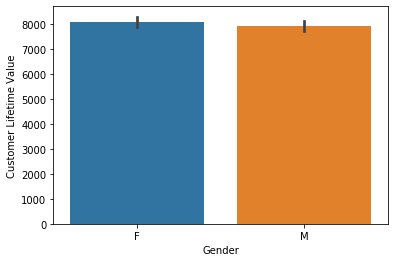

In [405]:
sns.barplot(x = 'Gender',y='Customer Lifetime Value',data = data)
plt.show()

Our model , is not biased based on gender, but still we can see that the average customer lifetime value is the same for both male and female.

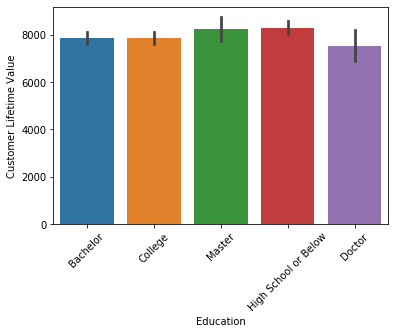

In [406]:
sns.barplot(x = 'Education',y='Customer Lifetime Value',data = data)
plt.xticks(rotation=45)
plt.show()

We can also see that education is not a significant feature for assesing the lifetime value of the customer.

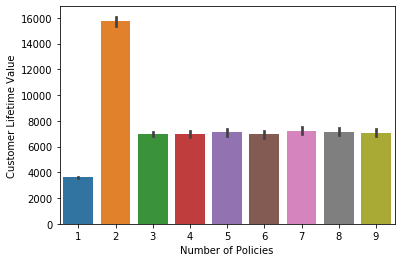

In [407]:
sns.barplot(x = 'Number of Policies',y='Customer Lifetime Value',data = data)
plt.show()

We can see a pattern here, customer's who have taken only 1 policy have lower customer lifetime value, and customer's who have taken 3 or greater show a similar trend, so we can bin all the customer who have taken number of policies 3 or greater into one bin, and suprisingly we can also see that the customer's who have taken 2 policies have very high customer lifetime value comparitively, which is challenging part to answer why, domain knowledge is much required here.

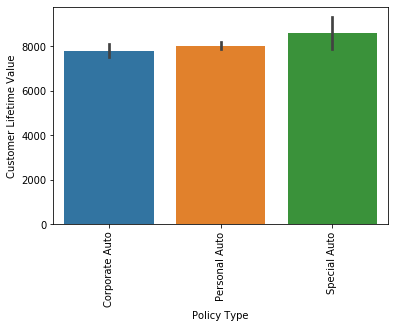

In [408]:
sns.barplot(x = 'Policy Type',y='Customer Lifetime Value',data = data)
plt.xticks(rotation = 90)
plt.show()

There isn't much difference in the customer lifetime value W.R.T what policy type he has taken, all we need is how much revenue a customer can bring to the company, so it doesnt matter what type of policy he/she has chosen.

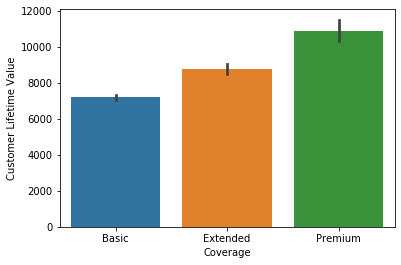

In [409]:
sns.barplot(x = 'Coverage',y='Customer Lifetime Value',data = data)
plt.show()

Customer Lifetime Value is different for different coverage, as we can also see that visually which make's sense, better the coverage better the monthly premium amount a custoemr pay's , better the revenue from that particular customer.

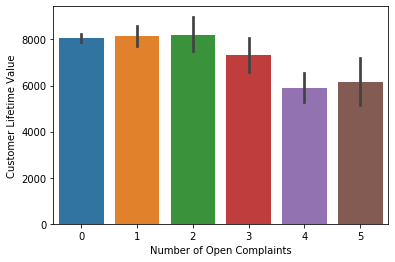

In [410]:
sns.barplot(x = 'Number of Open Complaints',y='Customer Lifetime Value',data = data)
plt.show()

Number of open complaint's also show kind of similar trend, where people who have complaints 2 or lesser have a similar pattern but where as >3 do not show any pattern we will have to do statistical test's to understand if this feature is really significant or it isn't.

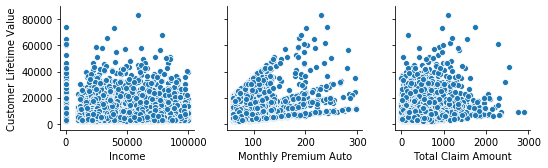

In [411]:
sns.pairplot(y_vars='Customer Lifetime Value',x_vars=['Income','Monthly Premium Auto','Total Claim Amount'],data = data)
plt.show()

We can clearly see that there is a linear relationship between Customer lifetime value and monthly premium auto, but we do not see any relationshio between income and the total claim amount.

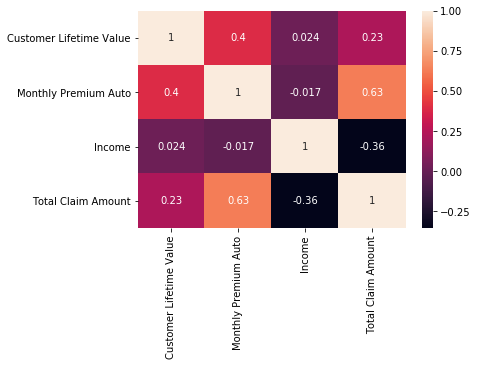

In [412]:
sns.heatmap(data[['Customer Lifetime Value','Monthly Premium Auto','Income','Total Claim Amount']].corr(),annot = True)
plt.show()

And we can clearly see in the co relation map, that customer lifetime value has a better co relation with monthly premium auto and acceptable co relation with total claim amount, but it show's no relationship with income, so again with all the visualization's we can come to the conclusion that we can dis regard the INCOME feature.

# BASE MODEL USING OLS.

#### Using label encoding just for the purpose of looking at the base model, encoding technique's may change furthur(one-hot encoding is used)

In [413]:
cols = data.select_dtypes(object).columns
for i in cols:
    data[i] = le.fit_transform(data[i])

In [414]:
X = data.drop('Customer Lifetime Value',axis=1)
y = data['Customer Lifetime Value']

In [415]:
X_sm = X
X_sm = sm.add_constant(X_sm)
lm = sm.OLS(y,X_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.166
Model:                                 OLS   Adj. R-squared:                  0.164
Method:                      Least Squares   F-statistic:                     78.82
Date:                     Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                             12:16:53   Log-Likelihood:                -92831.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9110   BIC:                         1.859e+05
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           872.5455    499.361      1.747      0.081    -106.315    1851.406
Customer                         -0.0767      0.025     -3.073      0.002      -0.126      -0.028
State                            30.3958     51.107      0.595      0.552     -69.786     130.578
Response                       -434.8693    192.448     -2.260      0.024    -812.111     -57.627
Coverage                       -186.4730    113.665     -1.641      0.101    -409.281      36.335
Education                        93.7398     47.771      1.962      0.050       0.097     187.382
Effective To Date                -0.1302      3.883     -0.034      0.973      -7.742       7.481
EmploymentStatus               -104.9096     73.576     -1.426      0.154    -249.134      39.315
Gender                         -137.3192    132.608     -1.036      0.300    -397.261     122.623
Income                            0.0022      0.003      0.662      0.508      -0.004       0.009
Location Code                   109.7248    116.551      0.941      0.347    -118.742     338.191
Marital Status                 -237.4657    110.640     -2.146      0.032    -454.344     -20.587
Monthly Premium Auto             82.7472      2.923     28.304      0.000      77.017      88.478
Months Since Last Claim           7.0304      6.544      1.074      0.283      -5.798      19.859
Months Since Policy Inception    -0.8386      2.373     -0.353      0.724      -5.489       3.812
Number of Open Complaints      -250.4702     72.355     -3.462      0.001    -392.303    -108.638
Number of Policies               63.8915     27.655      2.310      0.021       9.681     118.102
Policy Type                     441.5321    290.952      1.518      0.129    -128.798    1011.863
Policy                          -48.2763     86.230     -0.560      0.576    -217.306     120.753
Renew Offer Type               -348.8194     68.467     -5.095      0.000    -483.030    -214.609
Sales Channel                    22.4563     62.272      0.361      0.718     -99.610     144.523
Total Claim Amount               -0.5882      0.362     -1.626      0.104      -1.298       0.121
Vehicle Class                    45.9054     32.409      1.416      0.157     -17.623     109.434
Vehicle Size                    187.3131    123.322      1.519      0.129     -54.426     429.052
==============================================================================
Omnibus:                     5656.712   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64290.235
Skew:                           2.847   Prob(JB):                         0.00
Kurtosis:                      14.683   Cond. No.                 

<br>  After Looking at the base model and the p-value of the feature's, we know that the Hypothesis for the feature's is
- H0: Feature is not significant
- Ha: Feature is significant  
  But we just cant conclude the significance of the feature's just by base model and also without using any of the feature engineering technique's we have at our disposal.
  So we will first try to do the statistical test's of the feature for the feature selection, we can also use the forward selection and backward elimination , we will use the Variance inflation factor

# ASSUMPTIONS OF LINEAR REGRESSION.

## Linearity

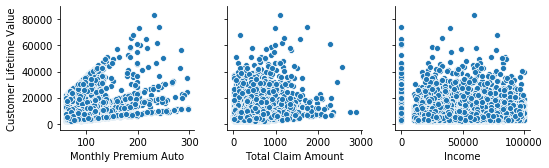

In [416]:
sns.pairplot(x_vars=['Monthly Premium Auto','Total Claim Amount','Income'],y_vars =['Customer Lifetime Value'],data = data)
plt.show()

We don't see any linear relationship between the variables and the Y varible , which fail's the first assumption of linear regression.

## Mean Of Residuals

In [417]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [418]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
residuals = y_pred-y_test
mean_of_residuals = np.mean(residuals)
print(f"The mean of the residuals is {mean_of_residuals}")

The mean of the residuals is -43.90575379383977


The 2nd assumption is that the mean of the residual's must be close to zero, which again fail's.

## HomoScedasticity

In [419]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals,X_test)
lzip(name, test)

[('F statistic', 1.3857813673428665), ('p-value', 1.1566661126424873e-09)]

- H0: Error terms are homoscedastic
- Ha: Error terms are not homoscedastic

p-value < 0.05 reject null hypothesis, error terms are not homoscedastic

## Test of normality of residuals.

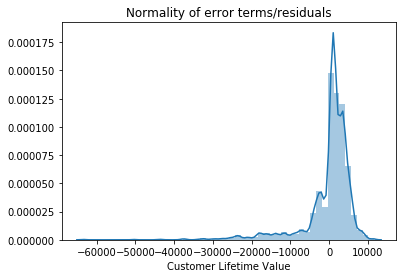

In [420]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The distribution clearly show's that the residuals are not normally distributed, and the third assumption also fail's.

# Auto Co-relation.

In [421]:
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.0764489502600801

- Ho: Auto correlation is absent
- Ha: Auto correlation is present

The P-value is >0.05 ,we fail to reject the null hypothesis, auto co relation is absent.

## Multi-Colinearity

Out of the five assumption's we base model doesnt satisfy 3 out of them, we will try to satisfy them in the furthur process.

# STATISTICAL ANALYSIS.

Considering CLTV (Customer Lifetime Value) as the target variable, we shall try to understand how each of the independent variables are contributing towards the target variable.

Since our target variable is a continuous variable, we will have to perform ANOVA to understand how significant are the independent variables towards target variable.

For ANOVA,
- Null hypothesis is that there is no significant difference among the groups
- Alternative hypothesis is that there is at least one significant difference among the groups

# State v/s Customer Lifetime Value

In [422]:
data = pd.read_csv('data.csv')

In [423]:
State = data.groupby('State')
Washington = State.get_group('Washington')['Customer Lifetime Value']
Arizona = State.get_group('Arizona')['Customer Lifetime Value']
Nevada = State.get_group('Nevada')['Customer Lifetime Value']
California = State.get_group('California')['Customer Lifetime Value']
Oregon = State.get_group('Oregon')['Customer Lifetime Value']

In [424]:
for i in [Washington,Arizona,Nevada,California,Oregon]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=589.985409403956, pvalue=7.69655090624974e-129) 

NormaltestResult(statistic=1123.931182802557, pvalue=8.73865582665683e-245) 

NormaltestResult(statistic=531.43144944664, pvalue=3.9914160352323387e-116) 

NormaltestResult(statistic=2047.3388756109375, pvalue=0.0) 

NormaltestResult(statistic=1836.7206700158117, pvalue=0.0) 



CLTV of all the 'States' follow a normal distribution.
Hence, we can perform ANOVA test.

In [425]:
f_oneway(Washington,Arizona,Nevada,California,Oregon)

F_onewayResult(statistic=0.27289285462119284, pvalue=0.8955985932127517)

* ALL STATE HAVE SAME MEAN'S OF CLTV
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable which means 'State' feature is not significant for predicting 'Customer Lifetime Value'

### Customer Response to marketing calls v/s Customer Lifetime Value:

In [426]:
Response = data[['Customer Lifetime Value','Response']].groupby('Response')
No = Response['Customer Lifetime Value'].get_group('No')
Yes = Response['Customer Lifetime Value'].get_group('Yes')

In [427]:
for i in [No,Yes]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=5322.477891516728, pvalue=0.0) 

NormaltestResult(statistic=639.4950779413575, pvalue=1.3658664040085885e-139) 



CLTV of all the 'Response' follow a normal distribution.
Hence, we can perform ANOVA test or test of mean for independent categories.

In [428]:
ttest_ind(No,Yes)

Ttest_indResult(statistic=0.8533582829612565, pvalue=0.393483030479461)

* RESPONE HAVE SAME MEAN'S OF CLTV
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable which means 'Response' feature is not significant for predicting 'Customer Lifetime Value'

### Coverage Type v/s Customer Lifetime Value:

In [429]:
Coverage = data[['Customer Lifetime Value','Coverage']].groupby('Coverage')
basic = Coverage['Customer Lifetime Value'].get_group('Basic')
extended = Coverage['Customer Lifetime Value'].get_group('Extended')
premium = Coverage['Customer Lifetime Value'].get_group('Premium')

In [430]:
for i in [basic,extended,premium]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3458.849448301252, pvalue=0.0) 

NormaltestResult(statistic=1947.8731066934433, pvalue=0.0) 

NormaltestResult(statistic=503.3468946321326, pvalue=5.007380445967074e-110) 



CLTV of all the 'Coverage' follow a normal distribution.
Hence, we can perform ANOVA test.

In [431]:
f_oneway(basic,extended,premium)

F_onewayResult(statistic=133.67511419504908, pvalue=6.0158970099807e-58)

* MEAN'S ARE NOT SAME FOR COVERAGE
* pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Coverage' which means 'Coverage' feature can be a significant for predicting 'Customer Lifetime Value'

### Education v/s Customer Lifetime Value:

In [432]:
Education = data[['Customer Lifetime Value','Education']].groupby('Education')
bachelor = Education['Customer Lifetime Value'].get_group('Bachelor')
college = Education['Customer Lifetime Value'].get_group('College')
highschool = Education['Customer Lifetime Value'].get_group('High School or Below')
master = Education['Customer Lifetime Value'].get_group('Master')
doctor = Education['Customer Lifetime Value'].get_group('Doctor')

In [433]:
for i in [basic,college,highschool,master,doctor]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3458.849448301252, pvalue=0.0) 

NormaltestResult(statistic=1808.0647185961266, pvalue=0.0) 

NormaltestResult(statistic=1797.622885789157, pvalue=0.0) 

NormaltestResult(statistic=420.3468077537673, pvalue=5.282633163257892e-92) 

NormaltestResult(statistic=207.1795478118804, pvalue=1.0269110120928107e-45) 



CLTV of all the categories of 'Education' follow a normal distribution.
Hence, we can perform ANOVA test.

In [434]:
f_oneway(bachelor,college,highschool,master,doctor)

F_onewayResult(statistic=2.4228653480521904, pvalue=0.04603615409468821)

* MEAN'S ARE NOT SAME FOR EDUCATION
* pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Education' which means 'Education' feature can be a significant for predicting 'Customer Lifetime Value'

### Employment Status v/s Customer Lifetime Value :

In [435]:
es = data[['Customer Lifetime Value','EmploymentStatus']].groupby('EmploymentStatus')
employed = es['Customer Lifetime Value'].get_group('Employed')
unemployed = es['Customer Lifetime Value'].get_group('Unemployed')
medleave = es['Customer Lifetime Value'].get_group('Medical Leave')
disabled = es['Customer Lifetime Value'].get_group('Disabled')
retired = es['Customer Lifetime Value'].get_group('Retired')

In [436]:
for i in [employed,unemployed,medleave,disabled,retired]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3761.129277691408, pvalue=0.0) 

NormaltestResult(statistic=1679.139433825762, pvalue=0.0) 

NormaltestResult(statistic=235.4863106944144, pvalue=7.324826645525092e-52) 

NormaltestResult(statistic=276.0845869374091, pvalue=1.119421586116707e-60) 

NormaltestResult(statistic=99.68654915712415, pvalue=2.256009325581312e-22) 



CLTV of all the categories of 'Employment Status' follow a normal distribution.
Hence, we can perform ANOVA test.

In [437]:
f_oneway(employed,unemployed,medleave,disabled,retired)

F_onewayResult(statistic=3.809808710328605, pvalue=0.00425058662383102)

* MEAN'S ARE NOT SAME FOR Employment Status
* pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Employment Status' which means 'Employment Status' feature can be a significant for predicting 'Customer Lifetime Value'

### Gender v/s Customer Lifetime Value :

In [438]:
g = data[['Customer Lifetime Value','Gender']].groupby('Gender')
f = g['Customer Lifetime Value'].get_group('F')
m = g['Customer Lifetime Value'].get_group('M')

In [439]:
for i in [f,m]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2834.0749107540296, pvalue=0.0) 

NormaltestResult(statistic=3243.1471942337193, pvalue=0.0) 



CLTV of all the categories of 'Gender' follow a normal distribution.
Hence, we can perform ANOVA test or test of mean for independent features.

In [440]:
ttest_ind(f,m)

Ttest_indResult(statistic=1.300686352501256, pvalue=0.19339865630769232)

* MEAN'S ARE SAME FOR GENDER
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Gender' which means 'Gender' feature is not significant for predicting 'Customer Lifetime Value'

### Location Code v/s Customer Lifetime Value :

In [441]:
location = data[['Customer Lifetime Value','Location Code']].groupby('Location Code')
sub = location['Customer Lifetime Value'].get_group('Suburban')
urban = location['Customer Lifetime Value'].get_group('Urban')
rural = location['Customer Lifetime Value'].get_group('Rural')

In [442]:
for i in [sub,urban,rural]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=4001.809435806882, pvalue=0.0) 

NormaltestResult(statistic=941.3620057193798, pvalue=3.8533434657380165e-205) 

NormaltestResult(statistic=1122.9340758970607, pvalue=1.4386781520042673e-244) 



CLTV of all the categories of 'Location Code' follow a normal distribution.
Hence, we can perform ANOVA test.

In [443]:
f_oneway(sub,urban,rural)

F_onewayResult(statistic=0.10800210605345337, pvalue=0.8976268526407198)

* MEAN'S ARE SAME FOR LOCATION CODE
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Location Code' which means 'Location Code' feature is not significant for predicting 'Customer Lifetime Value'

### Marital Status v/s Customer Lifetime Value :

In [444]:
MaritalStatus = data[['Customer Lifetime Value','Marital Status']].groupby('Marital Status')
Married = MaritalStatus['Customer Lifetime Value'].get_group('Married')
Single = MaritalStatus['Customer Lifetime Value'].get_group('Single')
Divorced = MaritalStatus['Customer Lifetime Value'].get_group('Divorced')

In [445]:
for i in [Married,Single,Divorced]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3677.216857754807, pvalue=0.0) 

NormaltestResult(statistic=1721.914498898464, pvalue=0.0) 

NormaltestResult(statistic=680.597010523175, pvalue=1.6226952503119905e-148) 



CLTV of all the categories of 'Location Code' follow a normal distribution.
Hence, we can perform ANOVA test.

In [446]:
f_oneway(Married,Single,Divorced)

F_onewayResult(statistic=3.317664937589139, pvalue=0.036281036735873)

* MEANS ARE NOT SAME Marital Status
* pvalue < 0.05 implies that there is significant difference in the mean of target variable for at least on Group of 'Marital Status' which means 'Marital Status' feature can be significant for predicting 'Customer Lifetime Value'

### Policy v/s Customer Lifetime Value :

In [447]:
Policy  = data[['Customer Lifetime Value','Policy']].groupby('Policy')
p3 = Policy['Customer Lifetime Value'].get_group('Personal L3')
p2 = Policy['Customer Lifetime Value'].get_group('Personal L2')
p1 = Policy['Customer Lifetime Value'].get_group('Personal L1')
c3 = Policy['Customer Lifetime Value'].get_group('Corporate L3')
c2 = Policy['Customer Lifetime Value'].get_group('Corporate L2')
c1 = Policy['Customer Lifetime Value'].get_group('Corporate L1')
s3 = Policy['Customer Lifetime Value'].get_group('Special L3')
s2 = Policy['Customer Lifetime Value'].get_group('Special L2')
s1 = Policy['Customer Lifetime Value'].get_group('Special L1')

In [448]:
for i in [p3,p2,p1,c3,c2,c1,s3,s2,s1]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2454.8806553250483, pvalue=0.0) 

NormaltestResult(statistic=1239.8942061958492, pvalue=5.7596229383194274e-270) 

NormaltestResult(statistic=992.9674497188381, pvalue=2.3980483698011588e-216) 

NormaltestResult(statistic=605.9012411656124, pvalue=2.6928811836326553e-132) 

NormaltestResult(statistic=373.09668872516477, pvalue=9.617970377316392e-82) 

NormaltestResult(statistic=187.8953648881132, pvalue=1.5813934182974064e-41) 

NormaltestResult(statistic=81.04251038237228, pvalue=2.52256560971873e-18) 

NormaltestResult(statistic=98.75159886489641, pvalue=3.6004995993148485e-22) 

NormaltestResult(statistic=19.415176797916622, pvalue=6.0820211456712794e-05) 



CLTV of all the categories of 'Policy' follow a normal distribution.
Hence, we can perform ANOVA test.

In [449]:
f_oneway(p3,p2,p1,c3,c2,c1,s3,s2,s1)

F_onewayResult(statistic=1.1839990669675131, pvalue=0.3041951364145143)

* MEANS ARE SAME Marital Status
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Policy' which means 'Policy' feature is not significant for predicting 'Customer Lifetime Value'

### Renew Offer Type vs Customer Lifetime Value :

In [450]:
R  = data[['Customer Lifetime Value','Renew Offer Type']].groupby('Renew Offer Type')
o1 = R['Customer Lifetime Value'].get_group('Offer1')
o2 = R['Customer Lifetime Value'].get_group('Offer2')
o3 = R['Customer Lifetime Value'].get_group('Offer3')
o4 = R['Customer Lifetime Value'].get_group('Offer4')

In [451]:
for i in [o1,o2,o3,o4]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2617.6948383126864, pvalue=0.0) 

NormaltestResult(statistic=1936.9308789084942, pvalue=0.0) 

NormaltestResult(statistic=815.8559270625346, pvalue=6.904566619974463e-178) 

NormaltestResult(statistic=642.2059295134014, pvalue=3.5217156184052177e-140) 



CLTV of all the categories of 'Renew Offer Type' follow a normal distribution.
Hence, we can perform ANOVA test

In [452]:
f_oneway(o1,o2,o3,o4)

F_onewayResult(statistic=25.83261444494041, pvalue=1.238399930571374e-16)

* MEANS ARE NOT SAME FOR Renew Offer Type 
* pvalue < 0.05 implies that there is significant difference in the mean of target variable for at least on Group of 'Renew Offer Type' which means 'Renew Offer Type' feature can be significant for predicting 'Customer Lifetime Value'

### Sales Channel vs Customer Lifetime Value :

In [453]:
Sales  = data[['Customer Lifetime Value','Sales Channel']].groupby('Sales Channel')
agent = Sales['Customer Lifetime Value'].get_group('Agent')
branch = Sales['Customer Lifetime Value'].get_group('Branch')
call = Sales['Customer Lifetime Value'].get_group('Call Center')
web = Sales['Customer Lifetime Value'].get_group('Web')

In [454]:
for i in [agent,branch,call,web]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2249.8117586071908, pvalue=0.0) 

NormaltestResult(statistic=1778.5170859072064, pvalue=0.0) 

NormaltestResult(statistic=1209.3339649106563, pvalue=2.4915300560589623e-263) 

NormaltestResult(statistic=866.0244616685382, pvalue=8.814091447361906e-189) 



CLTV of all the categories of 'Sales Channel' follow a normal distribution.
Hence, we can perform ANOVA test

In [455]:
f_oneway(agent,branch,call,web)

F_onewayResult(statistic=0.8805454785276248, pvalue=0.4502779502550758)

* MEANS ARE SAME for Sales Channel
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Sales Channel' which means 'Sales Channel' feature is not significant for predicting 'Customer Lifetime Value'

### Vehicle Class vs Customer Lifetime Value :

In [456]:
VC  = data[['Customer Lifetime Value','Vehicle Class']].groupby('Vehicle Class')
fd = VC['Customer Lifetime Value'].get_group('Four-Door Car')
td = VC['Customer Lifetime Value'].get_group('Two-Door Car')
suv = VC['Customer Lifetime Value'].get_group('SUV')
sc = VC['Customer Lifetime Value'].get_group('Sports Car')
ls = VC['Customer Lifetime Value'].get_group('Luxury SUV')
lc = VC['Customer Lifetime Value'].get_group('Luxury Car')

In [457]:
for i in [fd,td,suv,sc,ls,lc]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2591.5563098196517, pvalue=0.0) 

NormaltestResult(statistic=967.8795815175732, pvalue=6.723869874448458e-211) 

NormaltestResult(statistic=911.8062937987764, pvalue=1.0087394816479343e-198) 

NormaltestResult(statistic=256.8651916324882, pvalue=1.6689077848613138e-56) 

NormaltestResult(statistic=93.79133396550114, pvalue=4.300021273979593e-21) 

NormaltestResult(statistic=112.96534867020267, pvalue=2.9504360994555045e-25) 



CLTV of all the categories of 'Vehicle Class' follow a normal distribution.
Hence, we can perform ANOVA test

In [458]:
f_oneway(fd,td,suv,sc,ls,lc)

F_onewayResult(statistic=267.1581168024349, pvalue=2.085525760212929e-267)

* MEANS ARE NOT SAME FOR Vehicle Class 
* pvalue < 0.05 implies that there is significant difference in the mean of target variable for at least on Group of 'Vehicle Class' which means 'Vehicle Class' feature can be significant for predicting 'Customer Lifetime Value'

### Vehicle Size v/s Customer Lifetime Value :

In [459]:
VS  = data[['Customer Lifetime Value','Vehicle Size']].groupby('Vehicle Size')
m = VS['Customer Lifetime Value'].get_group('Medsize')
s = VS['Customer Lifetime Value'].get_group('Small')
l = VS['Customer Lifetime Value'].get_group('Large')

In [460]:
for i in [m,s,l]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=4107.297603156226, pvalue=0.0) 

NormaltestResult(statistic=1277.51103714535, pvalue=3.908435944085235e-278) 

NormaltestResult(statistic=710.5562496753278, pvalue=5.066065984237427e-155) 



CLTV of all the categories of 'Vehicle Size' follow a normal distribution.
Hence, we can perform ANOVA test

In [461]:
f_oneway(m,s,l)

F_onewayResult(statistic=2.382494601032998, pvalue=0.09237737701331775)

* MEANS ARE SAME for Vehicle Size
* pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Vehicle Size' which means 'Vehicle Size' feature is not significant for predicting 'Customer Lifetime Value'

# Furthur Modelling:

- So we did the EDA and also the Statistical Analysis, so now we can just dis regard the feature's which we saw that wouldnt contribute for our model.

In [462]:
data.drop(['State','Customer','Response','EmploymentStatus','Gender','Location Code','Vehicle Size','Policy','Policy Type','Sales Channel','Income','Effective To Date','Education'],axis=1,inplace = True)

In [463]:
data.head()

,Customer Lifetime Value,Coverage,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Renew Offer Type,Total Claim Amount,Vehicle Class
0,2763.519279,Basic,Married,69,32,5,0,1,Offer1,384.811147,Two-Door Car
1,6979.535903,Extended,Single,94,13,42,0,8,Offer3,1131.464935,Four-Door Car
2,12887.431650,Premium,Married,108,18,38,0,2,Offer1,566.472247,Two-Door Car
3,7645.861827,Basic,Married,106,18,65,0,7,Offer1,529.881344,SUV
4,2813.692575,Basic,Single,73,12,44,0,1,Offer1,138.130879,Four-Door Car


- Though the feature's months since policy inception, months since last claim, number of open complaints and number of policies are all numerical, but they are discrete number's and we will consider them as categorical feature's while preparing the model.

- Firstly, according to our EDA, we saw that the number of policies >= 3 have similar trend so we will group all of them as 3

In [464]:
data['Number of Policies'] = np.where(data['Number of Policies']>2,3,data['Number of Policies'])

Second, when we convert the numerical feature's to categorical, our normal practice is label encoding for ordinal data and one hot for nominal data, but we can also use one hot encoding for ordinal data if there isnt any curse of dimensionality, so we will convert the categorical to numerical with one-hot encoding / dummification.

In [465]:
new = pd.get_dummies(data,columns=['Coverage','Marital Status','Number of Policies','Renew Offer Type','Vehicle Class'],drop_first=True)

In [466]:
new.head()

,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Coverage_Extended,Coverage_Premium,Marital Status_Married,Marital Status_Single,Number of Policies_2,Number of Policies_3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,2763.519279,69,32,5,0,384.811147,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,6979.535903,94,13,42,0,1131.464935,1,0,0,1,0,1,0,1,0,0,0,0,0,0
2,12887.431650,108,18,38,0,566.472247,0,1,1,0,1,0,0,0,0,0,0,0,0,1
3,7645.861827,106,18,65,0,529.881344,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,2813.692575,73,12,44,0,138.130879,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Spliting the data into 70(train) and 30(test)

In [467]:
X = new.drop('Customer Lifetime Value',axis=1)
y = new['Customer Lifetime Value']

In [468]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [469]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [470]:
lr.score(X_test,y_test)

0.6229090552681669

In [471]:
lr.score(X_train,y_train)

0.6389753771298572

So after removing the unnessary feature's our model is giving is an accuracy of about 60%, we would like to take it 70%
in the furthur models.

# Feature Selection-Forward, Backward

### Forward

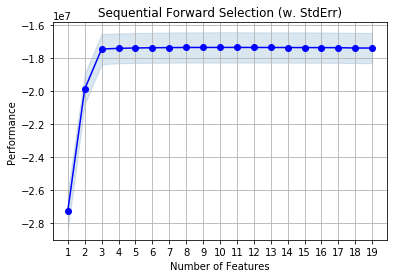

In [472]:
sfs = SFS(lr, k_features='best', forward=True, floating=False, 
          scoring='neg_mean_squared_error', cv=20)
model = sfs.fit(new.drop('Customer Lifetime Value', axis=1),new['Customer Lifetime Value'])
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [473]:
print('Selected features:', sfs.k_feature_idx_)

Selected features: (0, 3, 4, 6, 8, 9, 10, 11, 16, 17)


### Backward

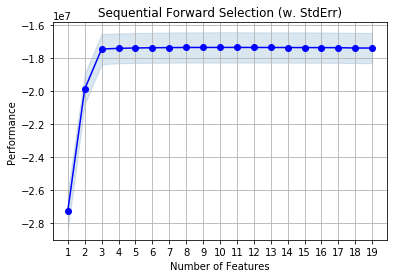

In [474]:
sfs = SFS(lr, k_features='best', forward=False, floating=False, 
          scoring='neg_mean_squared_error', cv=20)
model = sfs.fit(new.drop('Customer Lifetime Value', axis=1).values,new['Customer Lifetime Value'])
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [475]:
print('Selected features:', sfs.k_feature_idx_)

Selected features: (0, 3, 4, 6, 8, 9, 10, 11, 16, 17)


In [476]:
X.columns

Index(['Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Total Claim Amount', 'Coverage_Extended', 'Coverage_Premium',
       'Marital Status_Married', 'Marital Status_Single',
       'Number of Policies_2', 'Number of Policies_3',
       'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3',
       'Renew Offer Type_Offer4', 'Vehicle Class_Luxury Car',
       'Vehicle Class_Luxury SUV', 'Vehicle Class_SUV',
       'Vehicle Class_Sports Car', 'Vehicle Class_Two-Door Car'],
      dtype='object')

- Suprisingly Both the forward and backward selection gave us the same features to select for our model, so we will be sticking to the same feature's.

In [477]:
test_X = X[['Monthly Premium Auto','Number of Open Complaints','Total Claim Amount','Coverage_Premium','Marital Status_Single','Number of Policies_2','Number of Policies_3','Renew Offer Type_Offer2','Vehicle Class_SUV','Vehicle Class_Sports Car']]

In [478]:
train = []
test = []

In [479]:
X_train,X_test,y_train,y_test = train_test_split(test_X,y,test_size=0.3,random_state=100)

In [480]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [481]:
test.append(lr.score(X_test,y_test))

In [482]:
train.append(lr.score(X_train,y_train))

- So we can clearly see that the feature's removed didnt contribute to tell us the differing variance in the data, so it was a good decision to remove those features.

In [483]:
metrics = [r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error]

In [484]:
y_pred = lr.predict(X_test)

In [485]:
r2 = []
mae = []
mape = []
mse = []

In [486]:
for i in metrics:
    print(i(y_test,y_pred))
    if i == r2_score:
        r2.append(i(y_test,y_pred))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred))
    else:
        mse.append(i(y_test,y_pred))

0.6229724358599134
2097.8073486328617
24.178603379078943
18228661.804602843


- We will consider the r2_Score and the Mean absolute percentage error as the metric's we are going to use to measure the model.

### Finding the best sample by random state for each model.

In [243]:
algo = [abr,gbr,dt,et,etr,br,rfr]

In [244]:
for i in algo:
    temp = 0
    print(f"New Model{i}")
    for j in range(1,300,1):
        NXT,NXt,NYT,NYt = train_test_split(X,y,test_size=0.3,random_state=j)
        i.fit(NXT,NYT)
        test_score = i.score(NXt,NYt)
        train_score = i.score(NXT,NYT)
        if test_score>temp:
            temp = test_score
            print(j,train_score,temp)

New ModelAdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)
1 0.6136490276083302 0.5219268822214072
2 0.5897923937545089 0.5826175057682348
4 0.5696739022018913 0.5889732879848465
5 0.5946356656320899 0.6073943923851313
11 0.5974943288678977 0.6291106938019461
80 0.5954925837344703 0.6303442041485445
83 0.6145915981692514 0.6456486733001188
New ModelGradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
       

We can see the best sample for each model, and we can also see which model is a good fit and which model is overfitting/underfitting model.
- AdaBoost is good model, but we will have to check for the metric's
- Gradient Boosting is the best model comparitively, again we will check for the metric's
- DecisionTree and the Extra Tree regressor model's are not working better for this data set , as the model is completing over fitting, we will check their metric's as well, but we wont use it for modelling.
- Bagging and random forest regressor model's are again overfitting model, which are not good model's are this data set, but again we will check the metrics.

# Decision Tree Regressor.

In [487]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=159)

In [488]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [489]:
y_pred_dt = dt.predict(X_test)

In [490]:
for i in metrics:
    print(i(y_test,y_pred_dt))
    if i == r2_score:
        r2.append(i(y_test,y_pred_dt))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_dt))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_dt))
    else:
        mse.append(i(y_test,y_pred_dt))

0.5452755746228345
1560.9806948037212
12.241096023016105
22430574.994008664


In [491]:
train.append(dt.score(X_train,y_train))
test.append(dt.score(X_test,y_test))

### Extra Tree Regressor.

In [492]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=69)

In [493]:
et.fit(X_train,y_train)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                   max_leaf_nodes=None, min_impurity_decrease=0.0,
                   min_impurity_split=None, min_samples_leaf=1,
                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                   random_state=None, splitter='random')

In [494]:
y_pred_et = et.predict(X_test)

In [495]:
for i in metrics:
    print(i(y_test,y_pred_et))
    if i == r2_score:
        r2.append(i(y_test,y_pred_et))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_et))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_et))
    else:
        mse.append(i(y_test,y_pred_et))

0.39846415939531465
1799.4911765753372
13.746224676116706
28778100.017640285


In [496]:
train.append(et.score(X_train,y_train))
test.append(et.score(X_test,y_test))

In [497]:
pd.DataFrame({'Model':['Linear Regression','Decision Tree','Extra Tree'],'R2_Score':r2,'MAE':mae,'MAPE':mape,'MSE':mse})

,Model,R2_Score,MAE,MAPE,MSE
0,Linear Regression,0.622972,2097.807349,24.178603,1.822866e+07
1,Decision Tree,0.545276,1560.980695,12.241096,2.243057e+07
2,Extra Tree,0.398464,1799.491177,13.746225,2.877810e+07


- We can clearly see that the Linear Regression model is having the best r2_Score, and decision tree and extra tree regressor have no better accuracy that so we will have to build our model using ensemlle technique's, boosting and bagging.

# ENSEMBLE METHODS.

In [498]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

### AdaBoost.

In [499]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=83)

In [500]:
abr.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [501]:
y_pred_abr = abr.predict(X_test)

In [502]:
for i in metrics:
    print(i(y_test,y_pred_abr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_abr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_abr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_abr))
    else:
        mse.append(i(y_test,y_pred_abr))

0.6366305690141126
2698.7394863512104
30.570630559151557
19324681.507662974


In [503]:
train.append(abr.score(X_train,y_train))
test.append(abr.score(X_test,y_test))

### Bagging.

In [504]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=292)
br.fit(X_train,y_train)
y_pred_br = br.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_br))
    if i == r2_score:
        r2.append(i(y_test,y_pred_br))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_br))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_br))
    else:
        mse.append(i(y_test,y_pred_br))

0.706847222985872
1502.6119246877415
11.550074824788076
14920848.926902117


In [505]:
train.append(br.score(X_train,y_train))
test.append(br.score(X_test,y_test))

### Extra Tree's.

In [506]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=69)
etr.fit(X_train,y_train)
y_pred_etr = etr.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_etr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_etr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_etr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_etr))
    else:
        mse.append(i(y_test,y_pred_etr))

0.6527193163491647
1532.0824166672385
11.687052163833268
16614268.965672648


In [507]:
train.append(etr.score(X_train,y_train))
test.append(etr.score(X_test,y_test))

### Gradient Boosting.

In [508]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=181)
gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_gbr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_gbr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_gbr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_gbr))
    else:
        mse.append(i(y_test,y_pred_gbr))

0.7020948219121623
1723.4764825922184
13.869188483919961
14826898.15971092


In [509]:
train.append(gbr.score(X_train,y_train))
test.append(gbr.score(X_test,y_test))

### Random Forest.

In [510]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=35)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_rfr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_rfr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_rfr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_rfr))
    else:
        mse.append(i(y_test,y_pred_rfr))

0.7027947522217488
1484.5544180530462
11.434811209520799
14198200.125758136


In [511]:
train.append(rfr.score(X_train,y_train))
test.append(rfr.score(X_test,y_test))

- Of all the model's we are inclined to choose gradient boosting as the next model, and furthur tweak the hyper parameter's of the model and also put this boosting model into bagging regressor and check for the model accuracy.

# NEXT MODEL:

In [512]:
hyper_params_gbr = {'loss':['ls','lad','huber'],'learning_rate':[0.1,0.01,1],'n_estimators':[100,150]}

In [297]:
gbr2 = GradientBoostingRegressor()

In [298]:
model = GridSearchCV(gbr2,param_grid=hyper_params_gbr)

In [299]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=181)

In [300]:
model.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
           

In [301]:
model.score(X_test,y_test)

0.7026574360399975

In [302]:
model.score(X_train,y_train)

0.7371078414289501

In [303]:
model.best_params_

{'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 100}

- These are the default parameter's of the model so no hyper parameter tuning for this model is required, let us try and put this model into the bagging regressor.

# Final Model(Boosting+bagging).

In [513]:
gbr2 = GradientBoostingRegressor()

In [514]:
br2 = BaggingRegressor(gbr2)

### Finding the best sample.

In [329]:
temp = 0
for j in range(1,300,1):
    NXT,NXt,NYT,NYt = train_test_split(X,y,test_size=0.3,random_state=j)
    br2.fit(NXT,NYT)
    test_score = br2.score(NXt,NYt)
    train_score = br2.score(NXT,NYT)
    if test_score>temp:
        temp = test_score
        print(j,train_score,temp)

1 0.7478722376305957 0.6700877356750166
2 0.7394052263751597 0.6937402397201642
4 0.7359455798308201 0.6966060128848723
35 0.7317625978977527 0.7101955492189995
87 0.734493343113315 0.7128823024297579


In [515]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=87)
br2.fit(X_train,y_train)
y_pred_br2 = br2.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_br2))
    if i == r2_score:
        r2.append(i(y_test,y_pred_br2))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_br2))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_br2))
    else:
        mse.append(i(y_test,y_pred_br2))

0.7078470503916543
1634.3489334526696
13.601710096090658
12595509.970734995


In [516]:
train.append(br2.score(X_train,y_train))
test.append(br2.score(X_test,y_test))

# Using KFold Validation:

In [517]:
test_scores = []
train_scores = []
cv = KFold(n_splits=10,random_state=42, shuffle=False)
for train_index,test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    br2.fit(X_train,y_train)
    test_scores.append(br.score(X_test, y_test))
    train_scores.append(br.score(X_train, y_train))

In [518]:
np.mean(train_scores)

0.8645859337269352

In [519]:
np.mean(test_scores)

0.863018783283634

**We can see that after using KFold validation we got our average training accuracy to be 86.45 and average testing accuracy to be 86.30, OUR final model is bagging regressor with base estimator gradient boosting regressor.**

In [520]:
ALL_SCORES = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Extra Tree','AdaBoost','Bagging',
                                    'Extra Trees','GradientBoosting','Random Forest','Final_Model'],
                           'Training_Score':train,'Testing_Score':test,'R2_Score':r2,'MAE':mae,'MAPE':mape,'MSE':mse})

In [521]:
ALL_SCORES

,Model,Training_Score,Testing_Score,R2_Score,MAE,MAPE,MSE
0,Linear Regression,0.638623,0.622972,0.622972,2097.807349,24.178603,1.822866e+07
1,Decision Tree,1.000000,0.545276,0.545276,1560.980695,12.241096,2.243057e+07
2,Extra Tree,1.000000,0.398464,0.398464,1799.491177,13.746225,2.877810e+07
3,AdaBoost,0.607073,0.636631,0.636631,2698.739486,30.570631,1.932468e+07
4,Bagging,0.940051,0.706847,0.706847,1502.611925,11.550075,1.492085e+07
5,Extra Trees,1.000000,0.652719,0.652719,1532.082417,11.687052,1.661427e+07
6,GradientBoosting,0.737108,0.702095,0.702095,1723.476483,13.869188,1.482690e+07
7,Random Forest,0.933907,0.702795,0.702795,1484.554418,11.434811,1.419820e+07
8,Final_Model,0.733682,0.707847,0.707847,1634.348933,13.601710,1.259551e+07
